# Importing necessary libraries

In [89]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

# Loading dataset

In [90]:
# Load the dataset into a DataFrame
df_train_pos = pd.read_csv(
    'C:/train_Arabic_tweets_positive_20190413.tsv', sep='\t', names=['sentiment', 'text'])

df_train_neg = pd.read_csv(
    'C:/train_Arabic_tweets_negative_20190413.tsv', sep='\t', names=['sentiment', 'text'])

df_test_pos = pd.read_csv(
    'C:/test_Arabic_tweets_positive_20190413.tsv', sep='\t', names=['sentiment', 'text'])

df_test_neg = pd.read_csv(
    'C:/test_Arabic_tweets_negative_20190413.tsv', sep='\t', names=['sentiment', 'text'])

# Concatenate positive and negative reviews
df_train = pd.concat([df_train_pos, df_train_neg])
df_test = pd.concat([df_test_pos, df_test_neg])
df = pd.concat([df_train, df_test])

# Dataset Exploration

In [91]:
# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Get the number of positive and negative text
num_pos = (df['sentiment'] == 'pos').sum()
num_neg = (df['sentiment'] == 'neg').sum()
print("Number of positive text:", num_pos)
print("Number of negative text:", num_neg)

# Get the distribution of review lengths
text_lengths = df['text'].apply(len)
print("Minimum text length:", text_lengths.min())
print("Maximum text length:", text_lengths.max())
print("Average text length:", text_lengths.mean())

Number of rows: 56795
Number of columns: 2
Number of positive text: 28513
Number of negative text: 28282
Minimum text length: 5
Maximum text length: 8109
Average text length: 67.3882912228189


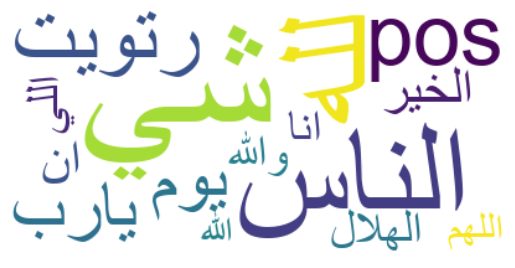

In [92]:
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Load the stop words
stop_words = set(stopwords.words('arabic'))

# Concatenate all the texts into a single string
all_text = ' '.join(df['text'])

# Clean the text
cleaned_text = ''.join([c for c in all_text if c.isalpha() or c.isspace()])

# Tokenize the text into words
words = word_tokenize(cleaned_text)

# Remove the stop words
words = [w for w in words if w.lower() not in stop_words]

# Count the frequency of each word
freq_dist = pd.Series(words).value_counts()

# Select the top 10 most frequent words
top_words = freq_dist.head(15)

# Reshape Arabic text to display correctly in word cloud
reshaped_text = arabic_reshaper.reshape(' '.join(top_words.index))
display_text = get_display(reshaped_text)

# Create and generate word cloud
wordcloud = WordCloud(font_path='arial', background_color='white').generate(display_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
label_map = {'neg': 0, 'pos': 1}
df['sentiment'] = np.array([label_map[label] for label in df['sentiment']])

# Data Preprocessing

In [94]:
from nltk.corpus import stopwords
from string import punctuation

# Load the stop words
stop_words = set(stopwords.words('arabic'))

def clean_text(text):
    # Clean the text and keeping only alphabetic and space characters
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text
for i in range(len(df)):
    new_review = clean_text(df['text'].iloc[i])
    df_train.loc[i, 'text'] = new_review

# Splitting Data into Train and Test Sets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Text Classification Using Multinomial Naive Bayes and Count Vectorizer

In [96]:
vectorizer = CountVectorizer()

In [97]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [98]:
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [99]:
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
#Accuracy: 0.7849282507262964

Accuracy: 0.7844000352143674


# Testing the model

In [100]:
new_phrase = "السيارة الجديدة التي اشتريتها رائعة"
new_phrase = preprocess_text(new_phrase)

In [101]:
new_phrase_vec = vectorizer.transform([new_phrase])

In [102]:
sentiment = clf.predict(new_phrase_vec)[0]
print("Sentiment:", sentiment)

Sentiment: 1


In [103]:
# Save the model as an h5 file
joblib.dump(clf, 'sentiment_model.h5')
# Save the fitted vectorizer to disk
joblib.dump(vectorizer, 'fitted_vectorizer.h5')

['fitted_vectorizer.h5']

In [104]:
phrases = ["هذا الفيلم ممل جداً", "أحب هذا المطعم كثيراً", "الطقس اليوم لطيف", "هذا الكتاب لم يعجبني",
           "الخدمة في هذا المطعم سيئة", "أحب الطبيعة الخلابة في هذه المنطقة", "لا أحب أن يكون الجو حاراً",
           "السيارة الجديدة التي اشتريتها رائعة", "السكن في هذه المنطقة غالي جداً", "لقد حصلت على وظيفة جديدة"]


#preprocessed_phrases = [preprocess_text(phrase) for phrase in phrases]

vectorized_phrases = vectorizer.transform(phrases)

sentiments = clf.predict(vectorized_phrases)

for i in range(len(phrases)):
    print("Phrase:", phrases[i])
    print("Sentiment:", sentiments[i])
    print()

Phrase: هذا الفيلم ممل جداً
Sentiment: 0

Phrase: أحب هذا المطعم كثيراً
Sentiment: 0

Phrase: الطقس اليوم لطيف
Sentiment: 0

Phrase: هذا الكتاب لم يعجبني
Sentiment: 1

Phrase: الخدمة في هذا المطعم سيئة
Sentiment: 0

Phrase: أحب الطبيعة الخلابة في هذه المنطقة
Sentiment: 0

Phrase: لا أحب أن يكون الجو حاراً
Sentiment: 0

Phrase: السيارة الجديدة التي اشتريتها رائعة
Sentiment: 1

Phrase: السكن في هذه المنطقة غالي جداً
Sentiment: 0

Phrase: لقد حصلت على وظيفة جديدة
Sentiment: 1

